## Problem 2

A nuclear network code is another example of solving a coupled system of ODEs. Imagine a situation where you have a number of constituents which can react with each other pairwise and form a new constituent. That's a network of constituents in which the transmutation through reactions is described by rate equations. 

Energy in stars is generated by nuclear reactions between different isotopes of elements. This is described by nuclear network code.
The first  reactions of the CN cycle for hydrogen burning are:

* $^{12}\mathrm{C}+\mathrm{p} \rightarrow ^{13}\mathrm{N}+\mathrm{\gamma}$ followed immediately by the $\beta$ decay of $^{13}\mathrm{N}$ to $^{13}\mathrm{C}$
* $^{13}\mathrm{C}+\mathrm{p} \rightarrow ^{14}\mathrm{N}+\mathrm{\gamma}$ and
* $^{14}\mathrm{N}+\mathrm{p} \rightarrow ^{15}\mathrm{O}+\mathrm{\gamma}$ followed immediately by the $\beta$ decay of $^{15}\mathrm{O}$ to $^{15}\mathrm{N}$
* $^{15}\mathrm{N}+ \mathrm{p} \rightarrow ^{12}\mathrm{C}+\mathrm{\alpha}$ which closes the CN cycle.


$\mathrm{\alpha}$ particles are of course $^{4}\mathrm{He}$ nuclei. 

The rate coefficients that describe how quickly the transmutations occur, are dependent on the temperature. To described this generally you have to take the coeffiecient as a function of T from a table and interpolate appropriately. Here you are asked to initially only enter the rate coefficients for one constant T.

Create a nuclear network code for the CN cycle that operates at a fixed temperature of $T=9\times10^{7}\mathrm{K}$ and a density of $\rho = 100 \mathrm{g/cm^3}$. 

The evolution of each species is governed by a rate equation that has on the RHS the sum of all production and destruction terms. In terms of the number density $N_j$ of species $j$ we collect all
production and destruction terms of reactions of the type $k + l
\rightarrow j + n$ 
$$
\frac{dN_j}{dt} = N_k N_l<\sigma v>_{kl,j} - N_j N_m <\sigma v>_{jm,o} 
$$
where $<\sigma v>$ is the reaction rate (the product of the cross section and the
relative velocity in the center-of-mass system averaged over the
appropriate distribution function) that can be obtained from the [NACRE compilation](http://www.astro.ulb.ac.be/nacreii). 

The number density is expressed in terms of a number fraction or mole
fraction $Y=X/A$ ,with $A$ the atomic mass number and $X$ the mass
fraction, by $N=Y \rho  N_\mathrm{A}$ where $N_\mathrm{A}$ is
the Avogadro number. The rate given in the NACRE tables is in terms of 
$  N_\mathrm{A} <\sigma v>$.

The inital abundances in terms of the mass fraction according to the solar abundance distribution are provided in the file `iniab1.4E-02As09.ppn`.

Answer the following questions:

1. What is the equillibrium state of the CN cycle in terms of the abundance ratios of the C and N isotopic ratios?
2. How long does it take to reach that equillibrium?
3. How long does it take to burn 10% of the initially available H?



### Bonus point
Generalize your code that it works for a user specified temperature in a  given range. You will have to provide a suitable interpolation formula to your code so that the terms involving the rate can differentiated.

In [3]:
# Choose "adopted" from the table at 

# N_j is the density of the species j

# Species is an isotope

# <\rho v>_{kl,j} is ????

# "p" is a proton

# Selecting "T_9" as 0.09

$$ k + l \rightarrow j + n $$
$$ j + m \rightarrow o + q $$

$$ \frac{dN}{dt} = N_k N_l R_{kl,j} - N_j N_m R_{jm \rightarrow o} $$

$$ T_9 \rightarrow T*10^9 $$
$$ 0.09 \rightarrow 0.09*10^9 = 9*10^7 $$

$$
\frac{dN_j}{dt} = N_k N_l<\sigma v>_{kl,j} - N_j N_m <\sigma v>_{jm,o} 
$$

### The Six Equations

$$
\frac{dC_{12}}{dt} = N_{N_{15}} N_{N_P} (2.03E-02) - N_{C_{12}} N_{N_P} (7.36E-06)
$$

$$
\frac{dC_{13}}{dt} = N_{C_{12}} N_{N_P} (7.36E-06) - N_{N_{13}} N_{N_P} (3.52E-05)
$$

$$
\frac{dN_{14}}{dt} = N_{C_{13}} N_{N_P} (3.52E-05) - N_{N_{14}} N_{N_P} (2.36E-07)
$$

$$
\frac{dO_{15}}{dt} = N_{N_{14}} N_{N_P} (2.36E-07) - N_{O_{15}} N_{N_P} (2.03E-02)
$$

$$
\frac{d{He}_4}{dt} = N_{N_{15}} N_{N_P} (2.03E-02)
$$

$$
\frac{dp}{dt} = - (N_{C_{12}} N_{N_P} (7.3E-06) + N_{C_{13}} N_{N_P} (3.52E-05) + N_{N_{14}} N_{N_P} (2.36E-07) + N_{N_{15}} N_{N_P} (2.03E-02)
$$

Populating the interactive namespace from numpy and matplotlib


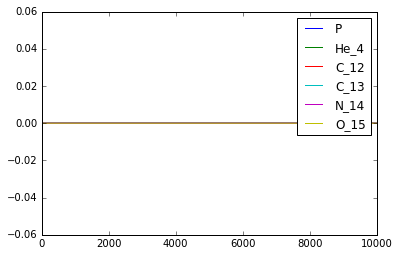

In [27]:
% pylab inline

avro_num = 6.022140857E-1023
density = 100

## The six equations
def step_C_12(O_15, P, C_12):
    """
    Calculates the dC_12/dt
    """
    return (O_15 * P * (2.03E-02)) - (C_12 * P * (7.36E-06))

def step_C_13(C_12, P, C_13):
    """
    Calculates the dC_13/dt
    """
    return (C_12 * P * (7.36E-06)) - (C_13 * P * (3.52E-05))

def step_N_14(C_13, P, N_14):
    """
    Calculates the dN_14/dt
    """
    return (C_13 * P * (3.52E-05)) - (N_14 * P * (2.36E-07))

def step_O_15(N_14, P, O_15):
    """
    Calculates the dO_15/dt
    """
    return (N_14 * P * (2.36E-07)) - (O_15 * P * (2.03E-02))

def step_He_4(O_15, P):
    """
    Calculates the dHe_4/dt
    """
    return O_15 * P * (2.03E-02)

def step_P(C_12, P, C_13, N_14, O_15):
    """
    Calculates the dP/dt
    """
    return -1 * ((C_12 * P * (7.36E-06)) + (C_13 * P * (3.52E-05)) + (N_14 * P * (2.36E-07)) + (O_15 * P * (2.03E-02)))

# Initial fractions
fractions = {
    "P":    7.1538567255E-01,
    "He_4": 2.7025513111E-01,
    "C_12": 2.4825306734E-03,
    "C_13": 3.0083012115E-05,
    "N_14": 7.3396723494E-04,
    "O_15": 1.8049744286E-06
}

step_size = 1
start = 0
end = 10000
time = linspace(start, end, (end - start) / step_size)

P_set = [(fractions["P"] / 1) * avro_num * density]
He_4_set = [(fractions["He_4"] / 4) * avro_num * density]
C_12_set = [(fractions["C_12"] / 12) * avro_num * density]
C_13_set = [(fractions["C_13"] / 13) * avro_num * density]
N_14_set = [(fractions["N_14"] / 14) * avro_num * density]
O_15_set = [(fractions["O_15"] / 15) * avro_num * density]


for time_step,time_val in enumerate(time):
    if time_step == 1:
        continue
    cur_P = P_set[time_step-1]
    cur_He_4 = He_4_set[time_step-1]
    cur_C_12 = C_12_set[time_step-1]
    cur_C_13 = C_13_set[time_step-1]
    cur_N_14 = N_14_set[time_step-1]
    cur_O_15 = O_15_set[time_step-1]
    
    dP = step_P(cur_C_12, cur_P, cur_C_13, cur_N_14, cur_O_15) / step_size
    P_set.append(dP)
    
    dHe_4 = step_He_4(cur_O_15, cur_P) / step_size
    He_4_set.append(dHe_4)
    
    dC_12 = step_C_12(cur_O_15, cur_P, cur_C_12) / step_size
    C_12_set.append(dC_12)

    dC_13 = step_C_13(cur_C_12, cur_P, cur_C_13) / step_size
    C_13_set.append(dC_13)
    
    dN_14 = step_N_14(cur_C_13, cur_P, cur_N_14)
    N_14_set.append(dN_14)
    
    dO_15 = step_O_15(cur_N_14, cur_P, cur_O_15)
    O_15_set.append(dO_15)
    
plot(time, P_set, label="P")
plot(time, He_4_set, label="He_4")
plot(time, C_12_set, label="C_12")
plot(time, C_13_set, label="C_13")
plot(time, N_14_set, label="N_14")
plot(time, O_15_set, label="O_15")
legend()